In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from glob import glob
from collections import Counter
import albumentations as A


In [3]:
# ====== PATH CONFIG (KAGGLE) ======
DATASET_ROOT = "/kaggle/input/py-crackdb-1"

cls_with = os.path.join(DATASET_ROOT, "Classification/With crack")
cls_without = os.path.join(DATASET_ROOT, "Classification/Without crack")

with_imgs = sorted(glob(os.path.join(cls_with, "*.jpg")))
without_imgs = sorted(glob(os.path.join(cls_without, "*.jpg")))

print("With crack images:", len(with_imgs))
print("Without crack images:", len(without_imgs))


With crack images: 369
Without crack images: 200


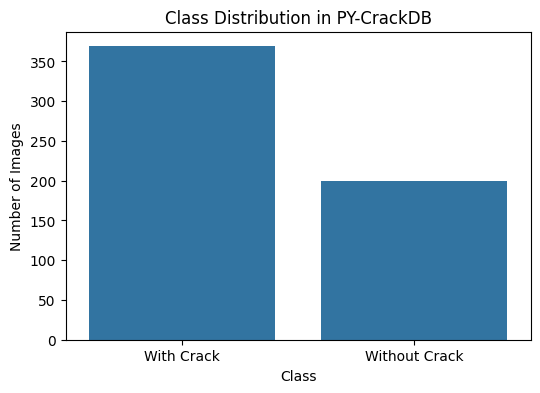

[369, 200]

In [4]:
labels = ["With Crack", "Without Crack"]
counts = [len(with_imgs), len(without_imgs)]

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=counts)
plt.title("Class Distribution in PY-CrackDB")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.show()

counts


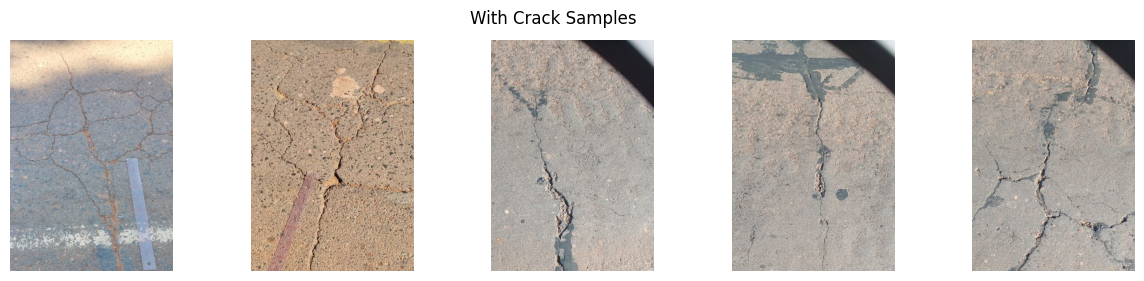

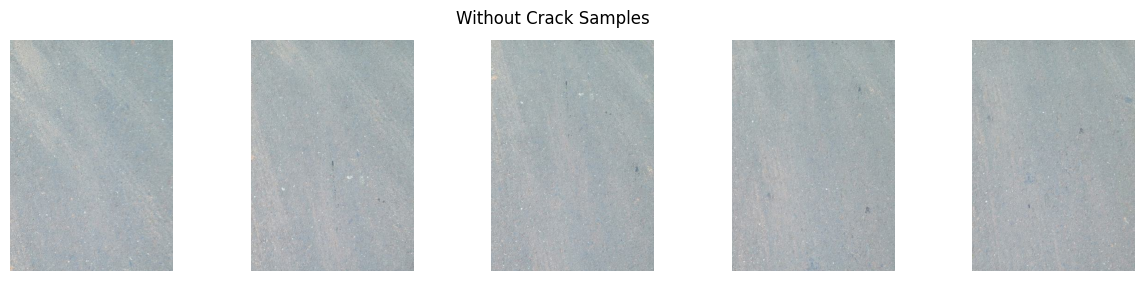

In [5]:
def show_samples(img_list, title, n=5):
    plt.figure(figsize=(15,3))
    for i, img_path in enumerate(img_list[:n]):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_samples(with_imgs, "With Crack Samples")
show_samples(without_imgs, "Without Crack Samples")


In [6]:
resolutions = []
aspect_ratios = []
color_means = []

for img_path in with_imgs + without_imgs:
    img = cv2.imread(img_path)
    h, w, c = img.shape
    resolutions.append((w, h))
    aspect_ratios.append(w / h)
    color_means.append(img.mean(axis=(0,1)))

res_df = pd.DataFrame(resolutions, columns=["Width", "Height"])
res_df.describe()


,Width,Height
count,569.0,569.0
mean,351.0,500.0
std,0.0,0.0
min,351.0,500.0
25%,351.0,500.0
50%,351.0,500.0
75%,351.0,500.0
max,351.0,500.0


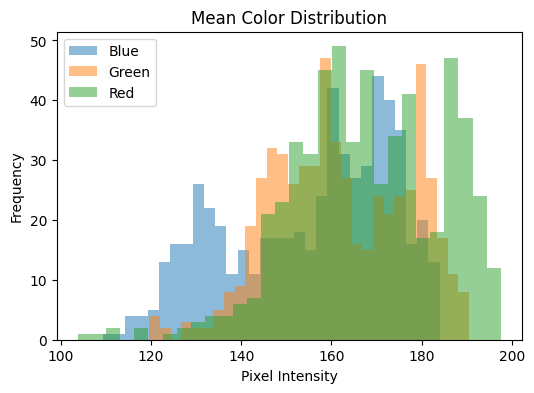

In [7]:
color_means = np.array(color_means)

plt.figure(figsize=(6,4))
plt.hist(color_means[:,0], bins=30, alpha=0.5, label="Blue")
plt.hist(color_means[:,1], bins=30, alpha=0.5, label="Green")
plt.hist(color_means[:,2], bins=30, alpha=0.5, label="Red")
plt.legend()
plt.title("Mean Color Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


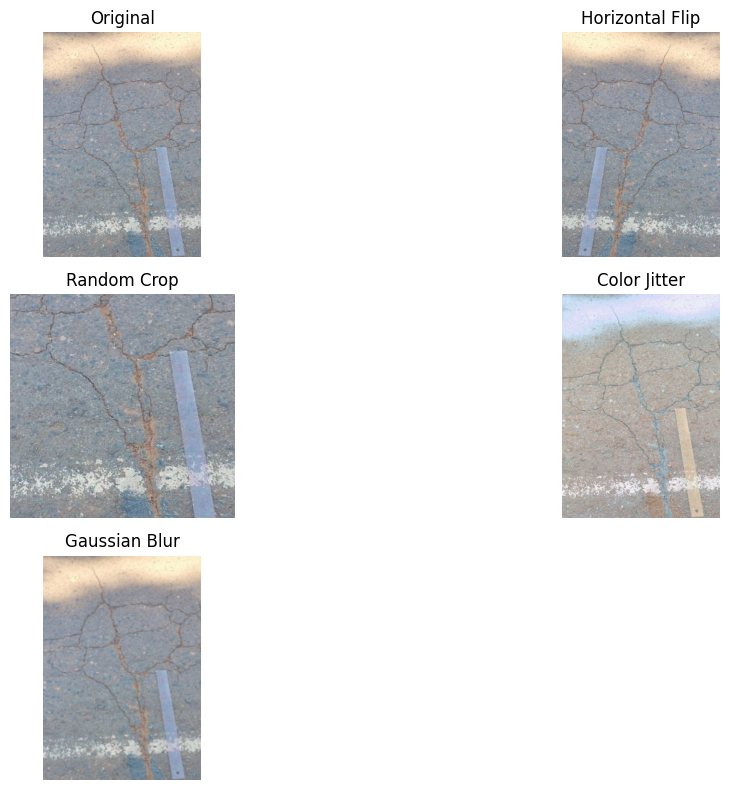

In [8]:
augmentations = {
    "Horizontal Flip": A.HorizontalFlip(p=1.0),
    "Random Crop": A.RandomCrop(300, 300, p=1.0),
    "Color Jitter": A.ColorJitter(brightness=0.2, contrast=0.2, p=1.0),
    "Gaussian Blur": A.GaussianBlur(blur_limit=5, p=1.0)
}

sample_img = cv2.imread(with_imgs[0])
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
plt.imshow(sample_img)
plt.title("Original")
plt.axis("off")

for i, (name, aug) in enumerate(augmentations.items(), start=2):
    augmented = aug(image=sample_img)["image"]
    plt.subplot(3,2,i)
    plt.imshow(augmented)
    plt.title(name)
    plt.axis("off")

plt.tight_layout()
plt.show()
